In [1]:
#importing required libraries 
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from sklearn import preprocessing
from keras.layers import Dense, Flatten
from keras.models import Sequential
from keras.utils import to_categorical
from keras.datasets import mnist


In [2]:
# load dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [3]:
#size of the training data set
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [4]:
#Checking the len of Training Data set
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0] # is the first index position

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

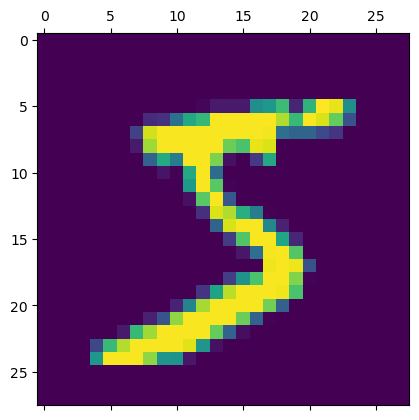

In [7]:
# showing the  first image in 2-D matrix in matplotlib

plt.matshow(X_train[0])

In [8]:
# checking the above o/p with out y_train eg we got X_train[0]=5 and y_train[0]=5

y_train[0] 

5

In [9]:
#dividing the images by 255 will make the range between 0 to 1
X_train = X_train/255
X_test = X_test/255

In [10]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [11]:
# going to flatten our training data and test data set i.e Column stacking by using reshape() from pandas

X_train_flattened = X_train.reshape(len(X_train),28*28)
X_test_flattened = X_test.reshape(len(X_test),28*28)

In [12]:
X_train_flattened.shape

(60000, 784)

In [13]:
#Checking the conversion of 2-D into 1-D

X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
# creating a simple neural network using keras

model = keras.Sequential([
keras.layers.Dense(600,input_shape=(784,), activation = "relu"),
keras.layers.Dense(400, activation = "sigmoid"),  ####hidden layers
keras.layers.Dense(200, activation = "sigmoid"),
keras.layers.Dense(75, activation = "sigmoid"),
keras.layers.Dense(10, activation = "softmax")
])

In [15]:
#compiling the model
model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [16]:
history=model.fit(X_train_flattened, y_train,validation_data=(X_test_flattened,y_test),epochs=10)


Epoch 1/10
1875/1875 [==============================] - 30s 15ms/step - loss: 0.2930 - accuracy: 0.9182 - val_loss: 0.1257 - val_accuracy: 0.9639
Epoch 2/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.1022 - accuracy: 0.9703 - val_loss: 0.0975 - val_accuracy: 0.9709
Epoch 3/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.0687 - accuracy: 0.9801 - val_loss: 0.0799 - val_accuracy: 0.9774
Epoch 4/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.0507 - accuracy: 0.9847 - val_loss: 0.0807 - val_accuracy: 0.9770
Epoch 5/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0429 - accuracy: 0.9869 - val_loss: 0.0731 - val_accuracy: 0.9791
Epoch 6/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0330 - accuracy: 0.9900 - val_loss: 0.0730 - val_accuracy: 0.9799
Epoch 7/10
1875/1875 [==============================] - 29s 15ms/step - loss: 0.0273 - accuracy: 0.9915 - val_loss: 0.0686 -

In [17]:
#Evaluating the model

model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0813 - accuracy: 0.9818


[0.08132210373878479, 0.9818000197410583]

In [18]:
y_predictions = model.predict(X_test_flattened)
print(y_test[0])

313/313 [==============================] - 1s 4ms/step
7


In [19]:
np.argmax(y_predictions[0])

7

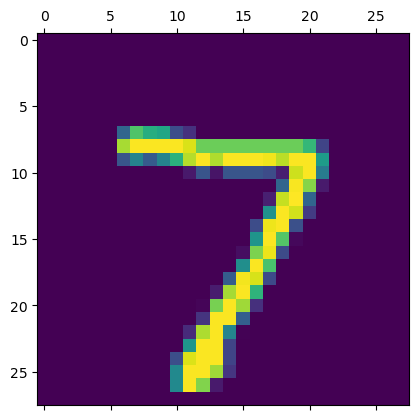

In [20]:
plt.matshow(X_test[0])

In [21]:
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint

In [22]:
#Now build the Sequential Model and dropout layers

model = Sequential([Flatten(input_shape=(784,)),   # reshape 28 row * 28 column data to 28*28 rows
                    Dense(256, activation='sigmoid'), # dense layer 1
                    Dropout(0.2), # DropOut 20% on dense layer 1
                    Dense(128, activation='sigmoid'), # dense layer 2
                    Dropout(0.1),  # DropOut 10% on dense layer 2
                    Dense(10, activation='softmax')  # dense layer 3
                    ])
#compile the model
model.compile( optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])

In [23]:
early_stopping = [EarlyStopping (monitor='val_accuracy', patience = 3)]

In [24]:
model.fit(X_train_flattened, y_train, epochs=100, batch_size=2000, validation_split=0.2, callbacks = early_stopping)

Epoch 1/100
24/24 [==============================] - 2s 48ms/step - loss: 2.1521 - accuracy: 0.2909 - val_loss: 1.8051 - val_accuracy: 0.6415
Epoch 2/100
24/24 [==============================] - 1s 40ms/step - loss: 1.5219 - accuracy: 0.6435 - val_loss: 1.1156 - val_accuracy: 0.7887
Epoch 3/100
24/24 [==============================] - 1s 40ms/step - loss: 0.9783 - accuracy: 0.7644 - val_loss: 0.7215 - val_accuracy: 0.8487
Epoch 4/100
24/24 [==============================] - 1s 40ms/step - loss: 0.6980 - accuracy: 0.8254 - val_loss: 0.5365 - val_accuracy: 0.8758
Epoch 5/100
24/24 [==============================] - 1s 42ms/step - loss: 0.5527 - accuracy: 0.8569 - val_loss: 0.4360 - val_accuracy: 0.8954
Epoch 6/100
24/24 [==============================] - 1s 41ms/step - loss: 0.4672 - accuracy: 0.8764 - val_loss: 0.3744 - val_accuracy: 0.9045
Epoch 7/100
24/24 [==============================] - 1s 42ms/step - loss: 0.4121 - accuracy: 0.8877 - val_loss: 0.3354 - val_accuracy: 0.9101
Epoch 

In [25]:
loss_and_metrics = model.evaluate(X_test, y_test, batch_size=32)
print("")
print("loss : {}".format(loss_and_metrics[0]))
print("accuracy : {}".format(loss_and_metrics[1]))

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9760

loss : 0.07969692349433899
accuracy : 0.9760000109672546


In [26]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0797 - accuracy: 0.9760


[0.07969692349433899, 0.9760000109672546]

In [27]:
# converting the prediction probabilities to class label for all test data points
Y_pred_labels = [np.argmax(i) for i in y_predictions]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 4, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 3, 9, 9, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 2, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 3, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [28]:
from tensorflow.math import confusion_matrix
conf_mat = confusion_matrix(y_test, Y_pred_labels)

In [29]:
print(conf_mat)

tf.Tensor(
[[ 971    0    0    2    0    0    2    0    1    4]
 [   0 1124    4    1    0    1    3    1    1    0]
 [   7    0 1009    4    2    0    2    7    1    0]
 [   1    0    1 1000    0    4    0    2    2    0]
 [   2    0    2    0  967    0    4    3    0    4]
 [   2    0    0    6    1  876    3    1    3    0]
 [   2    2    0    0    2    4  948    0    0    0]
 [   0    1    8    1    2    0    0 1011    2    3]
 [   4    0    4    5    4    6    1    3  945    2]
 [   2    3    0    5   22    5    0    5    0  967]], shape=(10, 10), dtype=int32)


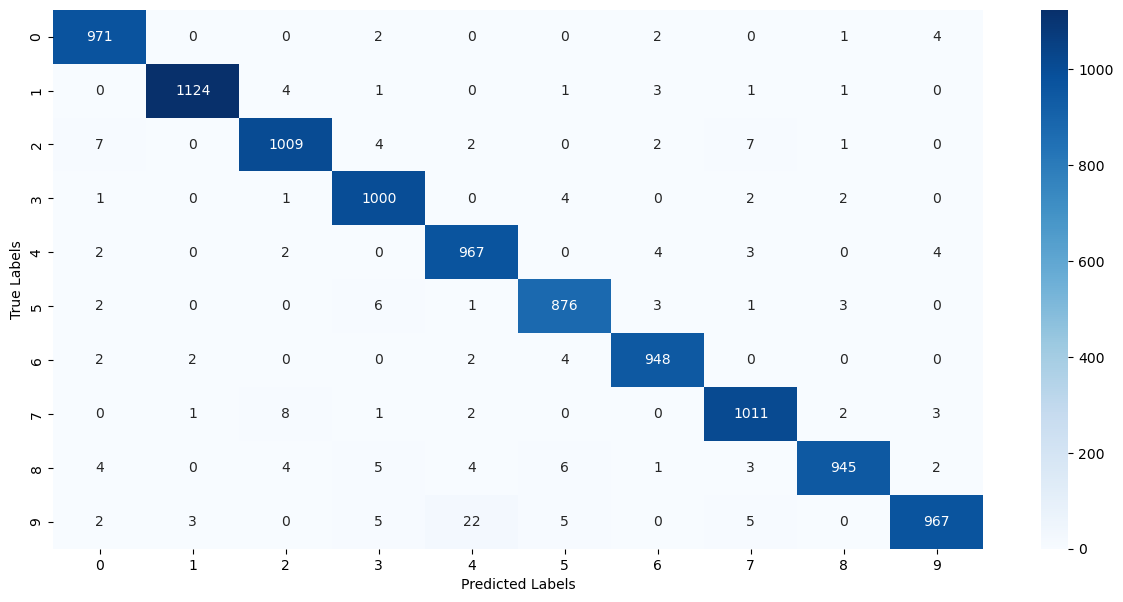

In [53]:
import seaborn as sns

plt.figure(figsize=(15,7))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True Labels')
plt.xlabel('Predicted Labels')
plt.show()

In [31]:
history.history

{'loss': [0.2929641902446747,
  0.1022341325879097,
  0.06873680651187897,
  0.05073259770870209,
  0.04294208809733391,
  0.03302164748311043,
  0.027273647487163544,
  0.023393170908093452,
  0.02046605572104454,
  0.017155680805444717],
 'accuracy': [0.918150007724762,
  0.9702500104904175,
  0.9801499843597412,
  0.984666645526886,
  0.9868999719619751,
  0.9899500012397766,
  0.9914666414260864,
  0.9924666881561279,
  0.9936666488647461,
  0.9950000047683716],
 'val_loss': [0.1257338523864746,
  0.09745614975690842,
  0.07986760884523392,
  0.08066097646951675,
  0.07307225465774536,
  0.07304803282022476,
  0.06862324476242065,
  0.07245698571205139,
  0.07616064697504044,
  0.08132210373878479],
 'val_accuracy': [0.9639000296592712,
  0.9708999991416931,
  0.977400004863739,
  0.9769999980926514,
  0.9790999889373779,
  0.9799000024795532,
  0.982200026512146,
  0.9811999797821045,
  0.9807999730110168,
  0.9818000197410583]}

In [32]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

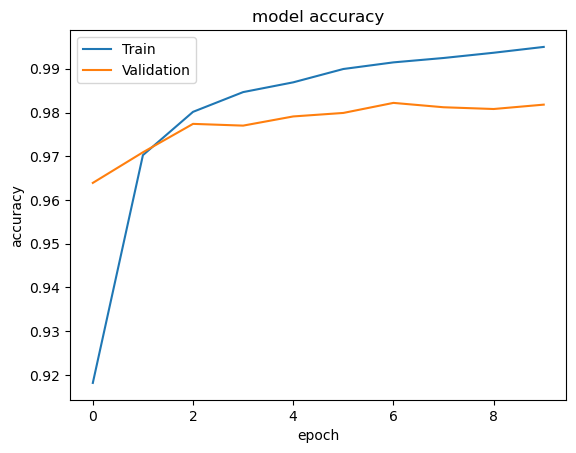

In [33]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

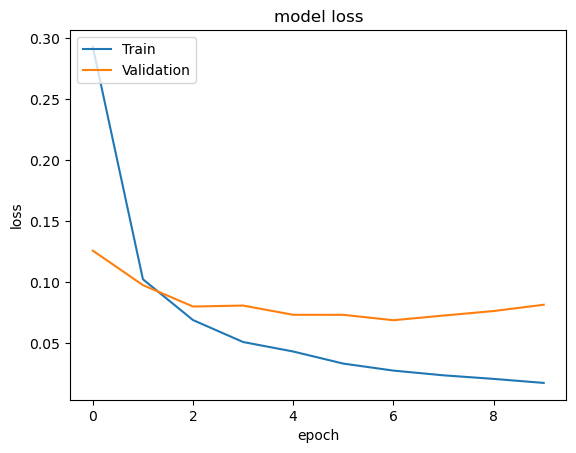

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

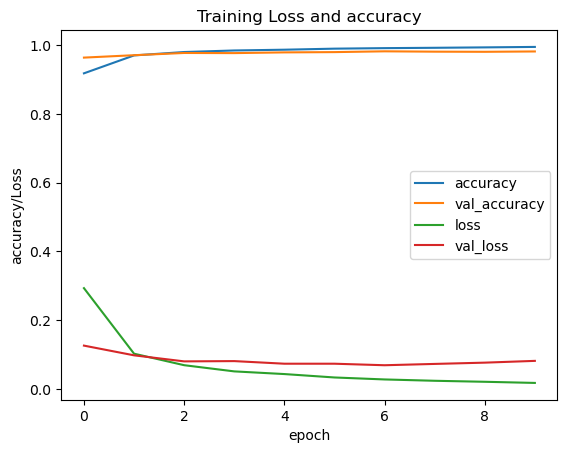

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss and accuracy')
plt.ylabel('accuracy/Loss')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy','loss','val_loss'])
plt.show()

In [ ]:
Conclusion: With above code We can see, that throughout the epochs, our model accuracy increases and our model loss decreases,
            that is good since our model gains confidence with its predictions.

1. The two losses (loss and val_loss) are decreasing and the accuracy 
   (accuracy and val_accuracy)are increasing. 
    So this indicates the model is trained in a good way.

2. The val_accuracy is the measure of how good the predictions of your model are. 
   So In this case, it looks like the model is well trained after 10 epochs

In [45]:
from sklearn.metrics import accuracy_score

In [49]:
y_pred=model.predict(X_test_flattened)
acc=accuracy_score(y_test,Y_pred_labels)

313/313 [==============================] - 1s 2ms/step


In [50]:
print('Accuracy Score={}%'.format(acc*100))

Accuracy Score=98.18%


In [51]:
from sklearn.metrics import classification_report

In [52]:
print(classification_report(y_test,Y_pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.98      0.99      0.98      1010
           4       0.97      0.98      0.98       982
           5       0.98      0.98      0.98       892
           6       0.98      0.99      0.99       958
           7       0.98      0.98      0.98      1028
           8       0.99      0.97      0.98       974
           9       0.99      0.96      0.97      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000

